In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing_price_dataset.csv')

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist(), "\n")
print(df.head())

✅ Dataset loaded successfully!
Shape: (5000, 7)
Columns: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'] 

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     2635

In [3]:
df = df.dropna()

# Detect the target column
# Assuming target column is named 'Price' (adjust if necessary)
target_col = 'Price' if 'Price' in df.columns else df.columns[-1]

# Separate features (X) and target (y)
X = df.drop(target_col, axis=1)
y = df[target_col]

# Encode categorical columns (if any)
X = pd.get_dummies(X, drop_first=True)

print(f"\nTarget column: {target_col}")
print("Features used for training:", X.columns.tolist())


Target column: Price
Features used for training: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Address_000 Todd Pines\nAshleyberg, KY 90207-1179', 'Address_001 Steve Plaza\nJessicastad, UT 25190', 'Address_0010 Gregory Loaf\nSouth Ericfort, VA 34651-0718', 'Address_00149 Raymond Knolls\nNew Jason, UT 75026', 'Address_002 Katherine Flat\nHartmanland, AZ 37973-3049', 'Address_0022 Young Rest\nLake Kevin, CA 25438-1821', 'Address_0029 Melinda Neck Apt. 591\nLake Gregoryshire, HI 60267', 'Address_003 Erica Passage Apt. 274\nEast Ritaton, KS 97261-8617', 'Address_003 Fernando Gateway Suite 145\nEast Danielshire, GA 76041', 'Address_003 Steven Port Apt. 012\nNorth Michaelbury, UT 27451-2671', 'Address_00301 Bradshaw Avenue Suite 833\nSuzannefurt, IN 00654-8754', 'Address_0032 Turner Ridge\nSouth Thomas, WA 66562-5367', 'Address_00347 Donald Cliff Apt. 813\nPort Kimberlyland, AR 23707', 'Address_004 Gilbert Rest A

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
lasso = Lasso(random_state=42)
params_lasso = {'alpha': np.logspace(-3, 3, 20)}  # test alphas from 0.001 to 1000

grid_lasso = GridSearchCV(lasso, params_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train_scaled, y_train)

best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test_scaled)

In [7]:
ridge = Ridge(random_state=42)
params_ridge = {'alpha': np.logspace(-3, 3, 20)}

grid_ridge = GridSearchCV(ridge, params_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)

best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_scaled)


In [8]:
def regression_metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n🔹 {model_name} Performance 🔹")
    print(f"Best Alpha: {grid_lasso.best_params_['alpha'] if model_name=='Lasso' else grid_ridge.best_params_['alpha']:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    return r2

r2_lasso = regression_metrics(y_test, y_pred_lasso, "Lasso")
r2_ridge = regression_metrics(y_test, y_pred_ridge, "Ridge")


🔹 Lasso Performance 🔹
Best Alpha: 1000.0000
R² Score: 0.9146
Mean Absolute Error (MAE): 81200.3235
Root Mean Squared Error (RMSE): 100370.2148

🔹 Ridge Performance 🔹
Best Alpha: 0.0010
R² Score: 0.6834
Mean Absolute Error (MAE): 153564.4079
Root Mean Squared Error (RMSE): 193278.8725


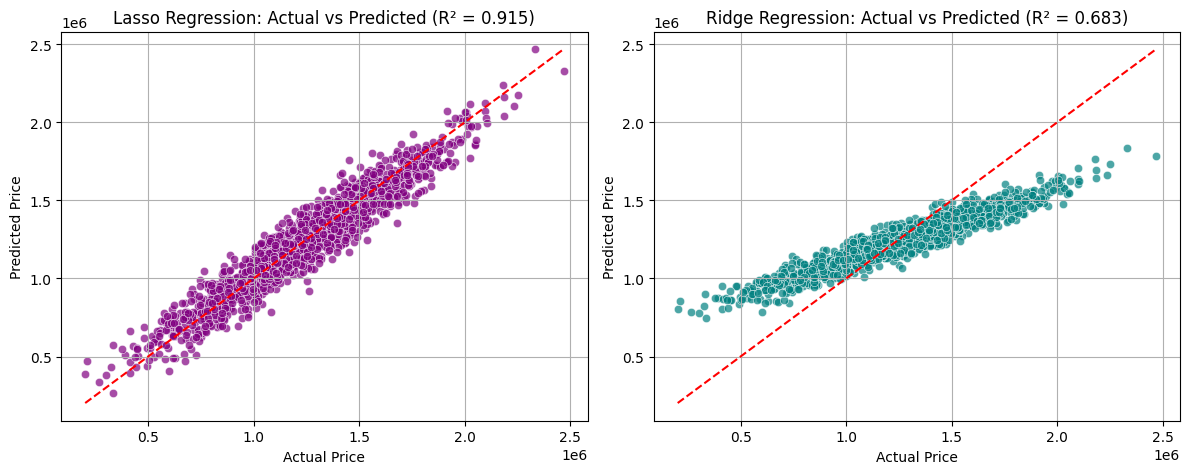

In [10]:
plt.figure(figsize=(12, 5))

# Lasso plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lasso, color='purple', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Lasso Regression: Actual vs Predicted (R² = {r2_lasso:.3f})")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)

# Ridge plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_ridge, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title(f"Ridge Regression: Actual vs Predicted (R² = {r2_ridge:.3f})")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
results = pd.DataFrame({
    'Model': ['Lasso (L1)', 'Ridge (L2)'],
    'Best Alpha': [grid_lasso.best_params_['alpha'], grid_ridge.best_params_['alpha']],
    'R² Score': [r2_lasso, r2_ridge]
})

print("\n Model Comparison Summary:")
print(results)


 Model Comparison Summary:
        Model  Best Alpha  R² Score
0  Lasso (L1)    1000.000  0.914633
1  Ridge (L2)       0.001  0.683445
